In [ ]:
!pip install plotly.express
!pip install -U spacy
!python -m spacy download es_core_news_sm
!python -m spacy download fr_core_news_sm
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import os
from spacy.language import Language
from flask import Flask, request, jsonify
import joblib
import nltk
import csv,sys
import warnings
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Ensure to download necessary NLTK resources before running this code
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For multilingual support (WordNet)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 55.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 37.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#Load & expore the dataset

from spacy.language import Language
nlp_en = spacy.load('en_core_web_sm')
df = pd.read_csv('/content/drive/MyDrive/Dataset/dataset.csv')
if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].fillna('')
    texts = df['text_column'].tolist()
else:
    print("'text_column' not found in the DataFrame. Check your column names.")

new_df = df.dropna()
print(new_df.to_string())
df.dropna(inplace = True)
print(df.to_string())
df.drop_duplicates(inplace = True)
print(df.to_string())

print("\nEDA and Visualization")
print("\nSummary statistics:")
print(df.describe(include='all'))

'text_column' not found in the DataFrame. Check your column names.
          queue priority language                                               subcategory                                                                      subject                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text
0    ACCOUNTING   MEDIUM       EN                              Customer Inquiries::Payments                           

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   queue        399 non-null    object
 1   priority     399 non-null    object
 2   language     399 non-null    object
 3   subcategory  399 non-null    object
 4   subject      399 non-null    object
 5   text         399 non-null    object
dtypes: object(6)
memory usage: 21.8+ KB


,queue,priority,language,subcategory,subject,text
count,399,399,399,399,399,399
unique,3,3,4,321,399,399
top,SOFTWARE,HIGH,EN,Customer Inquiries::Payments,Inquiry About Payment Method Update,"Dear Support Team,\n\nI would like to update t..."
freq,226,162,173,5,1,1


In [ ]:
# Text Preprocessing using Tokenization,lemma
from spacy.language import Language
nlp_en = spacy.load('en_core_web_sm')
df = pd.read_csv('/content/drive/MyDrive/Dataset/dataset.csv')
if 'text_column' in df.columns:
    df['text_column'] = df['text_column'].fillna('')
    texts = df['text_column'].tolist()
else:
    print("'text_column' not found in the DataFrame. Check your column names.")

new_df = df.dropna()
print(new_df.to_string())
df.dropna(inplace = True)
print(df.to_string())
df.drop_duplicates(inplace = True)
print(df.to_string())

nlp_en = spacy.load('en_core_web_sm')
nlp_es = spacy.load('es_core_news_sm')
nlp_fr = spacy.load('fr_core_news_sm')
for text in df['text']:
  emails = nlp_en (text)
  #doc = nlp(text)
  print(f"Text: {text}")
  print(f"TOKENS: {[token.text for token in emails]}")

for token in emails:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

'text_column' not found in the DataFrame. Check your column names.
          queue priority language                                               subcategory                                                                      subject                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text
0    ACCOUNTING   MEDIUM       EN                              Customer Inquiries::Payments                           

In [ ]:
# Text Preprocessing using stemmer
from nltk.stem.porter import *
p_stemmer = PorterStemmer()
words = ['run','runner','running','ran','runs','easily','fairly', 'jumps', 'happily','news', 'wonder', 'like', 'likely', 'university','development', 'best']
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli
jumps --> jump
happily --> happili
news --> news
wonder --> wonder
like --> like
likely --> like
university --> univers
development --> develop
best --> best


In [ ]:
# Text Preprocessing using Stopwords & TF-IDF vectorization

def detect_language(text):
    doc = nlp_en(text)
    return doc.lang_
print(df.columns)
df.columns = df.columns.str.strip()

#stopwords
nltk.download('stopwords')
print(nlp_en.Defaults.stop_words)
len(nlp_en.Defaults.stop_words)
nlp_en.vocab['myself'].is_stop

nlp_en.vocab['mystery'].is_stop
len(nlp_en.Defaults.stop_words)



df['content'] = df['subject'].fillna('') + " " + df['text'].fillna('')

# Drop rows with missing target values
df = df.dropna(subset=['queue', 'priority'])

# Fill missing values in 'content' with empty strings
df['content'].fillna('', inplace=True)

# Text preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['content'] = df['content'].apply(preprocess_text)
print(df[['content']])


vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['content']).toarray()
print(X)

Index(['queue', 'priority', 'language', 'subcategory', 'subject', 'text'], dtype='object')
{'in', 'against', 'anyhow', 'our', 'anywhere', 'eight', 'formerly', 'somehow', 'whereafter', 'hundred', 'been', 'first', 'hence', 'already', 'whither', "'s", 'several', 'during', 'no', 'empty', 'her', 'various', 'cannot', 'or', 'sixty', 'became', 'elsewhere', 'i', 'anyway', 'really', 'not', 'above', 'fifty', 'nothing', 'yourselves', 'alone', 'used', 'hers', 'latter', '‘ve', '’re', 'ten', 'one', 'around', 'either', 'among', 'whoever', 'so', 'n‘t', 'over', 'somewhere', 'with', 'ca', 'full', 'go', 'toward', 'neither', 'behind', 'please', 'sometimes', 'amount', 'more', "n't", '’m', 'except', 'latterly', 'whole', "'m", 'beside', 'otherwise', 'them', 'until', 'along', 'done', 'moreover', 'former', 'hereupon', 'may', '‘s', 'just', 'whether', 'indeed', "'ve", 'before', 'have', '’ve', 'down', 'thereby', 'everywhere', 'doing', 'for', 'afterwards', 'move', 'eleven', 'an', 'whenever', 'below', 'had', 'even',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['content']).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Split the data for model
# Target variables
from sklearn.model_selection import train_test_split
y_queue = df['queue']
y_priority = df['priority']

print(y_queue)
print(y_priority)

X_train_queue, X_test_queue, y_train_queue, y_test_queue = train_test_split(X, y_queue, train_size=0.2, random_state=42)
X_train_priority, X_test_priority,y_train_priority, y_test_priority = train_test_split(X, y_priority,test_size=0.2, random_state=42)

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#X_train_queue, X_test_queue, y_train_queue, y_test_queue = train_test_split(X, y_queue, test_size=0.2, random_state=42)
#X_train_priority, X_test_priority, y_train_priority, y_test_priority = train_test_split(X, y_priority, test_size=0.2, random_state=42)



0      ACCOUNTING
1      ACCOUNTING
2        SOFTWARE
3      ACCOUNTING
4        HARDWARE
          ...    
395      SOFTWARE
396      SOFTWARE
397      SOFTWARE
398      HARDWARE
399      SOFTWARE
Name: queue, Length: 399, dtype: object
0      MEDIUM
1      MEDIUM
2         LOW
3         LOW
4        HIGH
        ...  
395      HIGH
396      HIGH
397       LOW
398    MEDIUM
399      HIGH
Name: priority, Length: 399, dtype: object


In [ ]:
# Train a Random Forest classifier for 'queue' classification

from sklearn.ensemble import RandomForestClassifier
queue_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

queue_clf.fit(X_train_queue, y_train_queue)



RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate 'queue' classification model

y_pred_queue = queue_clf.predict(X_test_queue)
print("Queue Classification Report:\n", classification_report(y_test_queue, y_pred_queue))
print("Queue Classification Accuracy:", accuracy_score(y_test_queue, y_pred_queue))

Queue Classification Report:
               precision    recall  f1-score   support

  ACCOUNTING       0.00      0.00      0.00        79
    HARDWARE       0.00      0.00      0.00        71
    SOFTWARE       0.53      1.00      0.69       170

    accuracy                           0.53       320
   macro avg       0.18      0.33      0.23       320
weighted avg       0.28      0.53      0.37       320

Queue Classification Accuracy: 0.53125


In [ ]:
# Train a Random Forest classifier for 'priority' classification

priority_clf = RandomForestClassifier(n_estimators=100, random_state=42)
priority_clf.fit(X_train_priority, y_train_priority)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate 'priority' classification model
y_pred_priority = priority_clf.predict(X_test_priority)
print("Priority Classification Report:\n", classification_report(y_test_priority, y_pred_priority))
print("Priority Classification Accuracy:", accuracy_score(y_test_priority, y_pred_priority))

Priority Classification Report:
               precision    recall  f1-score   support

        HIGH       0.91      0.95      0.93        41
         LOW       1.00      0.75      0.86        16
      MEDIUM       0.80      0.87      0.83        23

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80

Priority Classification Accuracy: 0.8875


In [ ]:
y_prediction = priority_clf.predict(X_test_priority)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_priority, y_prediction)

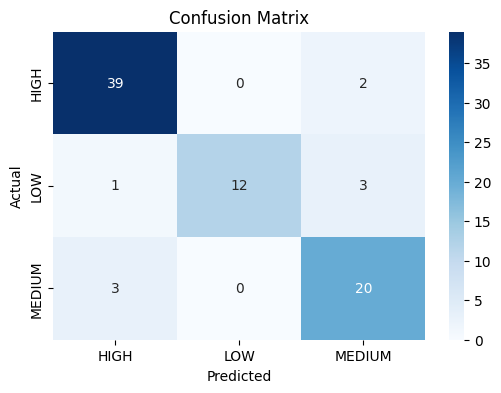

In [ ]:
# Plotting Confusion Matrix

conf_matrix = confusion_matrix(y_test_priority, y_pred_priority)
y = np.unique(y_test_priority)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 'priority' vs. 'queue'
import matplotlib.pyplot as plt
import plotly.express as px

# Print DataFrame columns to debug
print(df.columns)

# Create scatter plot if 'priority' column exists
if 'priority' in df.columns:
    fig_scatter = px.scatter(df, x='priority', y='queue', color='priority', title='Scatter Plot of Priority vs. Queue')
else:
    # Handle the case where 'priority' column is missing
    print("Column 'priority' is not in DataFrame. Available columns are:", df.columns)

fig_scatter.show()

Index(['queue', 'software_used'], dtype='object')
Column 'priority' is not in DataFrame. Available columns are: Index(['queue', 'software_used'], dtype='object')


In [ ]:
f = df.dropna(subset=['text'])  # Drop rows where 'text' is NaN
df['text'] = df['text'].astype(str)
df['queue_encoded'] = df['queue'].astype('category').cat.codes
queue_mapping = dict(enumerate(df['queue'].astype('category').cat.categories))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['queue_encoded'], test_size=0.2, random_state=42)

# Load pre-trained tokenizer and model
model_name = "xlm-roberta-base"  # Multilingual model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=df['queue_encoded'].nunique())

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Example: Predicting the priority of new tickets
train_texts = [
    "I can't access my account",
    "The website is down",
    "How do I reset my password?",
    "Why can't I log in?",
    "The page isn't loading",
    "I forgot my password"
]
train_labels = [1, 0, 1, 1, 0, 1]  # Example labels, such as priority levels

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit TF-IDF on training data
X_train_tfidf = tfidf.fit_transform(train_texts)

# Train a model (e.g., Naive Bayes classifier)
model = MultinomialNB()
model.fit(X_train_tfidf, train_labels)

# Example: Predicting the priority of new tickets
new_tickets = [
    "I can't access my account",
    "I need to update my payment details",
    "Why is my subscription not showing up?"
]

# Transform new tickets using the fitted TF-IDF vectorizer
new_tickets_tfidf = tfidf.transform(new_tickets)

# Predict priorities for new tickets
predicted_priorities = model.predict(new_tickets_tfidf)

print("Predicted priorities:", predicted_priorities)

Predicted priorities: [1 1 1]


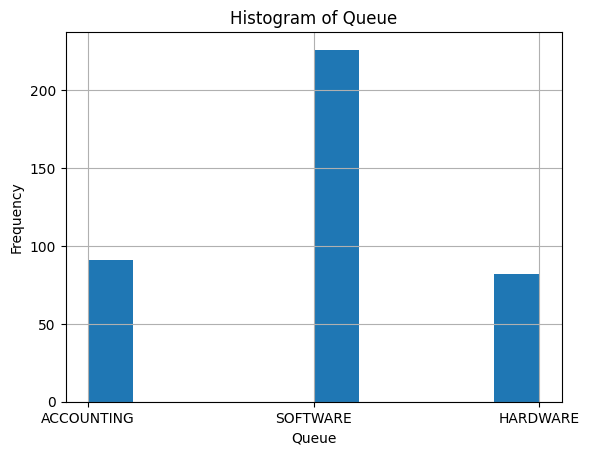

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame(df, columns=['queue'])

if 'queue' in df.columns:
    # Plot histogram
    df['queue'].hist()
    plt.xlabel('Queue')
    plt.ylabel('Frequency')
    plt.title('Histogram of Queue')
    plt.show()
else:
    print("Column 'queue' does not exist in the DataFrame.")

In [ ]:
fig_queue = px.histogram(df, x='queue', title='Distribution of Queue Categories', color='queue')
fig_queue.show()



In [ ]:
print(df.head())
print(df.columns)

        queue priority language                            subcategory  \
0  ACCOUNTING   MEDIUM       EN           Customer Inquiries::Payments   
1  ACCOUNTING   MEDIUM       DE  Employee Inquiries::Health and Safety   
2    SOFTWARE      LOW       EN                         Crypto Wallets   
3  ACCOUNTING      LOW       EN  Employee Inquiries::Staff Development   
4    HARDWARE     HIGH       EN                     Temperature Sensor   

                                             subject  \
0                Inquiry About Payment Method Update   
1                Mängel Gesundheitsbericht Anwendung   
2     Crypto Wallets Update Inquiry and Billing Info   
3  Possibility of Business Name Change on Next In...   
4  High Priority: Temperature Sensor Not Powering Up   

                                                text  
0  Dear Support Team,\n\nI would like to update t...  
1  Sehr geehrtes Support-Team, ich nutze Ihre Anw...  
2  Good day, I hope everything is great on your e... 

In [ ]:
fig_priority = px.histogram(df, x='priority', title='Distribution of Priority Levels', color='priority')
fig_priority.show()

fig_language = px.histogram(df, x='language', title='Distribution of Languages', color='language')
fig_language.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['queue', 'priority', 'language', 'subcategory', 'subject', 'text'] but received: software_used

In [ ]:
def extract_software(data):
    # Simple example: assuming software names are directly in the string
    return data.split('software_used:')[-1].strip()

# Apply extraction function to create a new column
df['software_used'] = df['queue'].apply(extract_software)

# Check the new column
print(df['software_used'].head())

# Plot histogram
fig_software = px.histogram(df, x='software_used', title='Distribution of Software Used', color='software_used')
fig_software.show()

0    ACCOUNTING
1    ACCOUNTING
2      SOFTWARE
3    ACCOUNTING
4      HARDWARE
Name: software_used, dtype: object


In [ ]:
def extract_software(data):
    # Simple example: assuming software names are directly in the string
    return data.split('hardware_used:')[-1].strip()

# Apply extraction function to create a new column
df['hardware_used'] = df['queue'].apply(extract_software)

# Check the new column
print(df['hardware_used'].head())

# Plot histogram
fig_hardware = px.histogram(df, x='hardware_used', title='Distribution of hardware Used', color='hardware_used')
fig_hardware.show()

0    ACCOUNTING
1    ACCOUNTING
2      SOFTWARE
3    ACCOUNTING
4      HARDWARE
Name: hardware_used, dtype: object


In [ ]:
def extract_software(data):
    # Simple example: assuming software names are directly in the string
    return data.split('accounting_used:')[-1].strip()

# Apply extraction function to create a new column
df['accounting_used'] = df['queue'].apply(extract_software)

# Check the new column
print(df['accounting_used'].head())

# Plot histogram
fig_accounting = px.histogram(df, x='accounting_used', title='Distribution of accounting Used', color='accounting_used')
fig_accounting.show()

0    ACCOUNTING
1    ACCOUNTING
2      SOFTWARE
3    ACCOUNTING
4      HARDWARE
Name: accounting_used, dtype: object
